In [ ]:
#task 1

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np


In [2]:

dev = qml.device("default.qubit", wires=2)

def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
@qml.qnode(dev)
def probs():
    circuit()
    return qml.probs(wires=[0, 1])
@qml.qnode(dev)
def sv():
    circuit()
    return qml.state()


In [3]:
print("Probabilities:", probs())

Probabilities: [0.5 0.  0.  0.5]


In [4]:
print("State vector:", sv())

State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


(<Figure size 500x300 with 1 Axes>, <Axes: >)

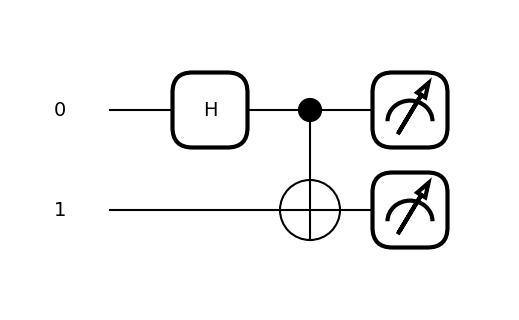

In [8]:
qml.draw_mpl(sv)()
#fig.show()


In [6]:
dev2 = qml.device("default.qubit", wires=2, shots=1000)
@qml.qnode(dev2)
def samples():
    circuit()
    return qml.sample(wires=[0, 1])


In [7]:
print("Samples:", samples()[:20])

Samples: [[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#task2 with 4 qubits

In [13]:
dev3 = qml.device("default.qubit", wires=4)
@qml.qnode(dev3)
def circuit1():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

In [14]:
print ("Probabilities for 4 qubits:", circuit1())

Probabilities for 4 qubits: [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

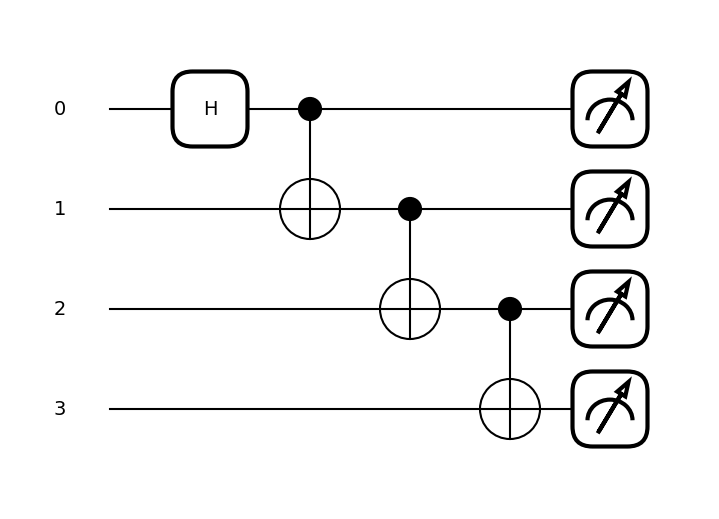

In [15]:
qml.draw_mpl(circuit1)()

In [ ]:
#task3  Rotation + Measurement Circuit

In [17]:
@qml.qnode(dev)
def circuit3(theta):
    qml.RY(theta, wires=0) 
    return qml.expval(qml.PauliZ(0))                

In [ ]:

theta = np.deg2rad(40)  
print("based on your angle theta, the expectation value is:", circuit3(theta))

based on your angle theta, the expectation value is: 0.7660444431189781


In [42]:
deg= np.linspace(0,360, 50)
expvals = [circuit3(np.deg2rad(d)) for d in deg]

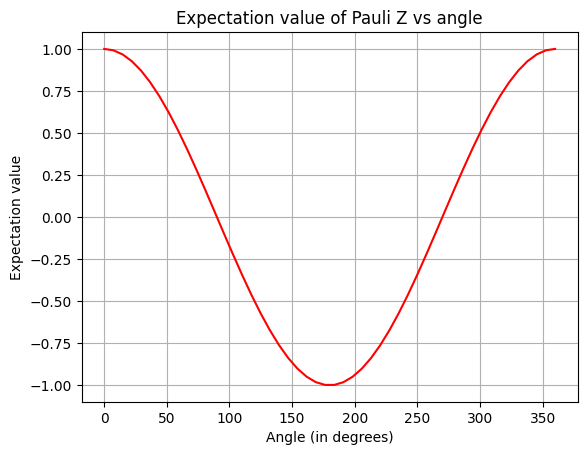

In [43]:
plt.plot(deg, expvals, "r-", label="Expectation value")
plt.xlabel('Angle (in degrees)')
plt.ylabel('Expectation value')
plt.title('Expectation value of Pauli Z vs angle')
plt.grid(True)
plt.show()


In [ ]:
#task 4

In [ ]:
@qml.qnode(dev)
def circuit4(theta):
    qml.RX(theta, wires=0) 
    return qml.expval(qml.PauliZ(0))    

In [ ]:
def cost(theta):
    return circuit4(theta)
theta = np.array(0.0, requires_grad=True) 

In [ ]:
opt= qml.GradientDescentOptimizer(stepsize=0.2)
steps=50
costs = []